In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('SuperstoreSales.csv', parse_dates=['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
furniture_df = df.loc[df['Category'] == 'Furniture']
furniture_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
furniture_df.shape

(2121, 21)

In [6]:
furniture_df['Order Date'].min(), furniture_df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [7]:
furniture = furniture_df.copy()

In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 
        'Product ID', 'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [9]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


#### Multiple orders in a day (means multiple records for each date). For time series, we usually aggregate/summarize data in days, weeks, months or years. <br>
So we use group by to aggregate data

In [11]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [13]:
furniture = furniture.set_index('Order Date')

In [14]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [15]:
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


#### There are timeseries specific functions avaiable to convert data into days, months and years

In [16]:
month_data = furniture['Sales'].resample('MS').mean()

In [17]:
month_data.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

In [18]:
month_data['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [19]:
month_data.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

In [20]:
month_data.values

array([ 480.19423077,  367.9316    ,  857.29152941,  567.48835714,
        432.0491875 ,  695.05924211,  601.1695    ,  457.52165625,
        992.35336667,  769.0154375 ,  980.22148636, 1532.298325  ,
        978.32846667,  522.39566667,  781.2364375 ,  805.82296154,
        624.9967    ,  428.5655    ,  719.70631579,  602.4120125 ,
       1382.79068421,  632.98018421, 1286.70135417, 1049.35541818,
        508.18286667,  356.86827273,  609.57580952,  695.37315789,
        687.26522727,  816.91075   ,  768.73641176,  734.30778235,
       1135.95337083,  624.87247368, 1271.345152  , 1410.71980769,
        397.60213333,  528.1798    ,  544.67224   ,  453.297905  ,
        678.302328  ,  826.4602913 ,  562.52485714,  857.88188889,
       1209.50858333,  875.362728  , 1277.81775862, 1256.298672  ])

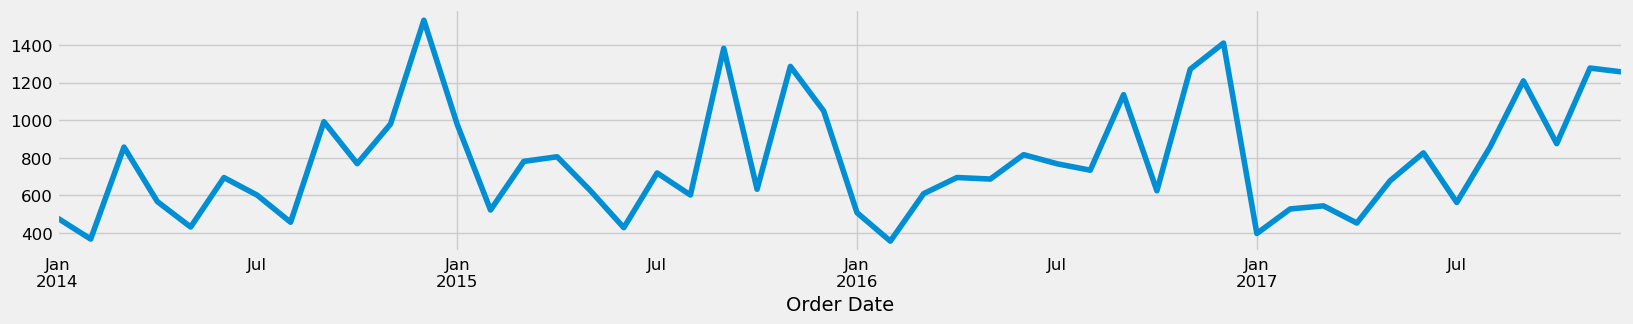

In [21]:
month_data.plot(figsize=(18, 3))
plt.show()

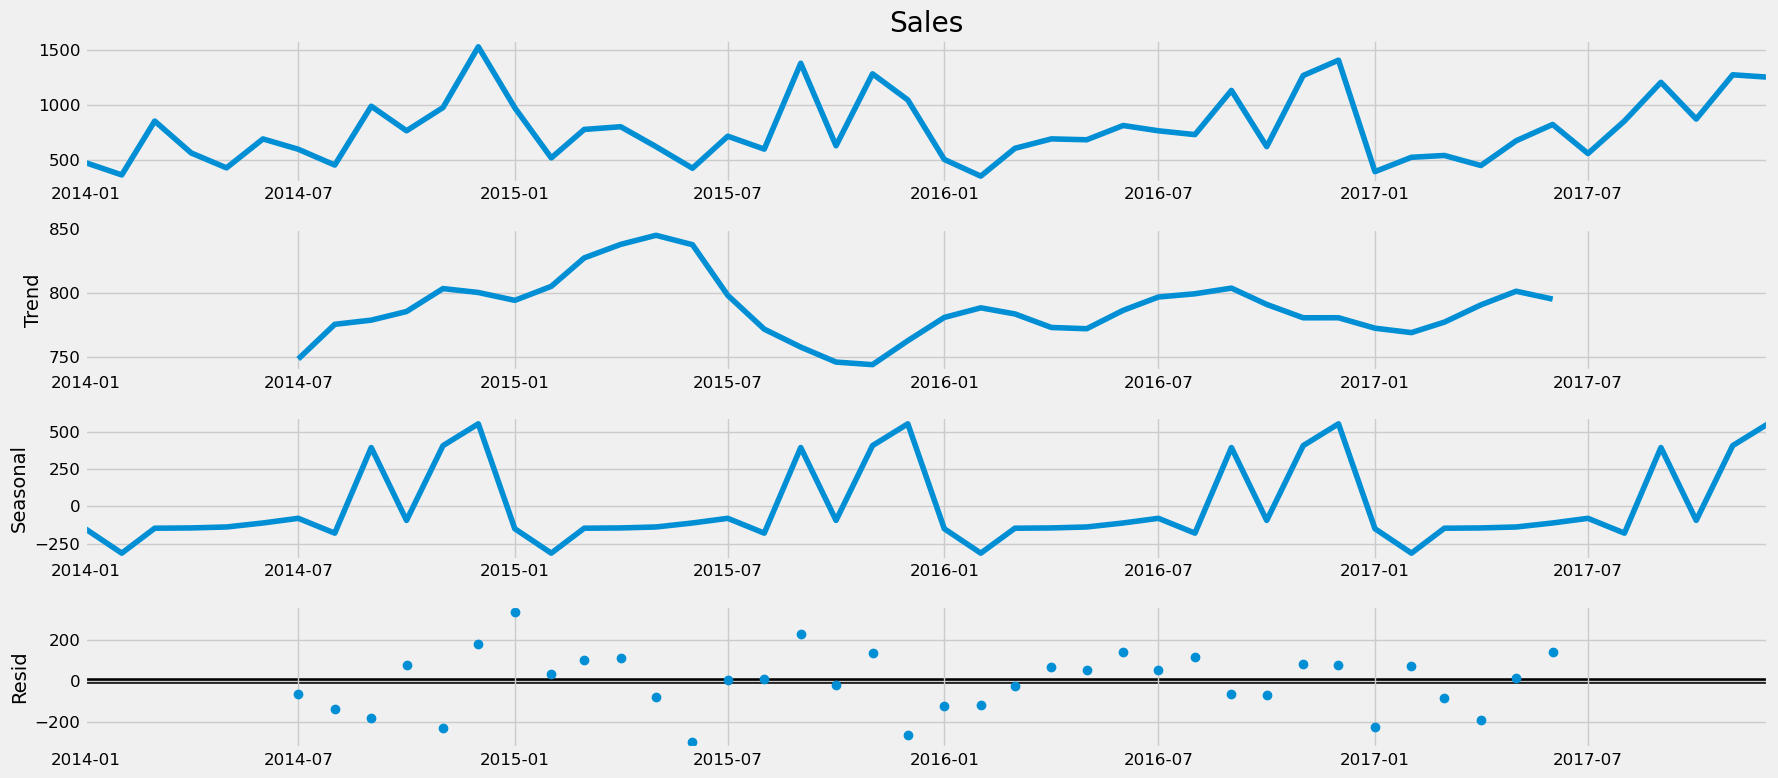

In [22]:
decomposition = sm.tsa.seasonal_decompose(month_data, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

## Modeling

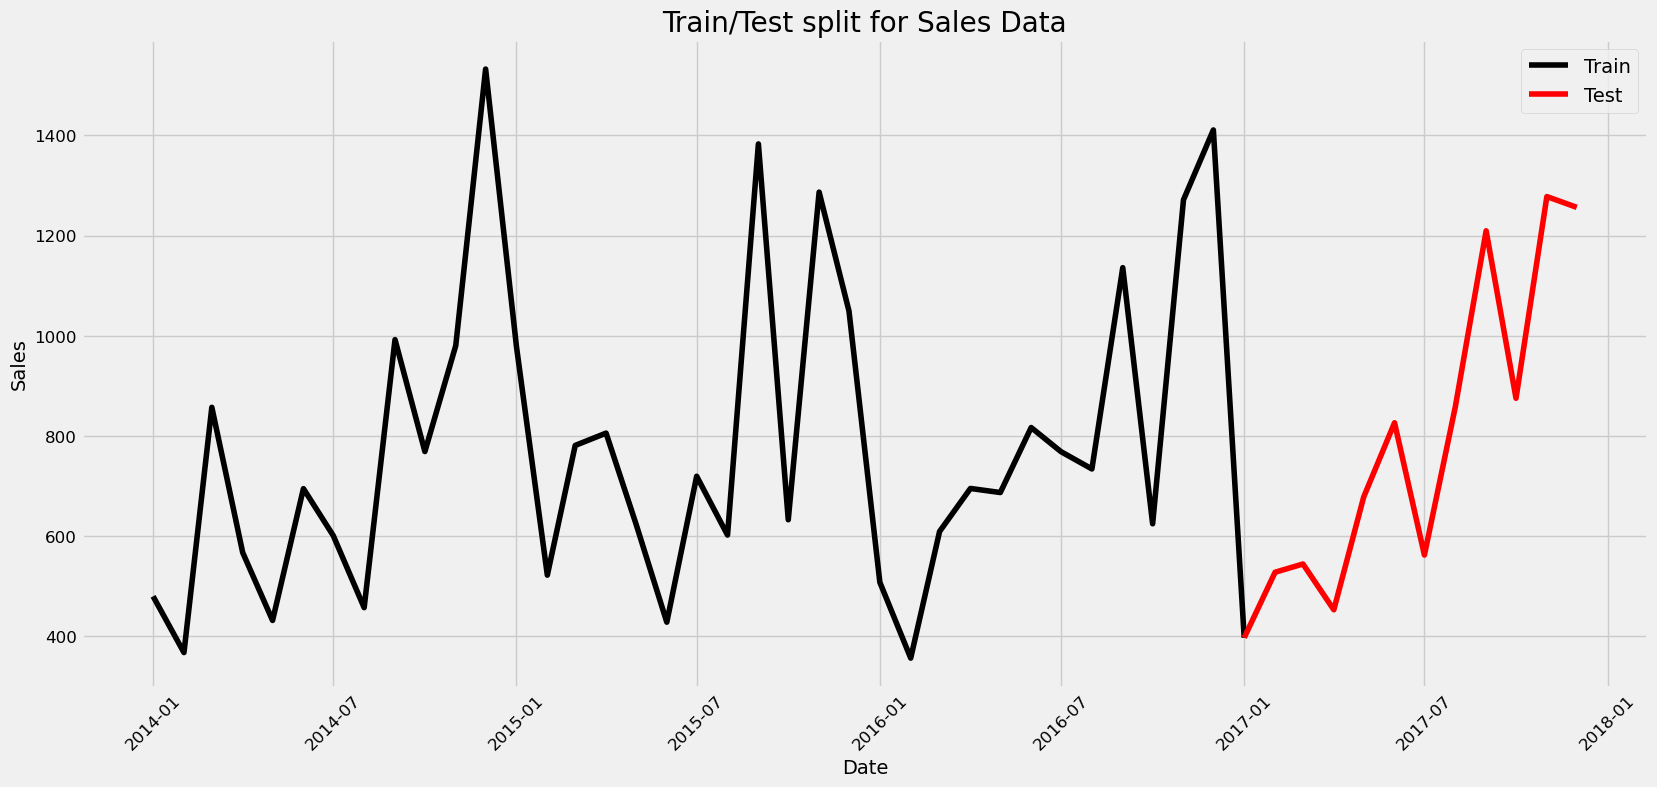

In [23]:
train = month_data[month_data.index <= pd.to_datetime("2017-01-01", format='%Y-%m-%d')]
test = month_data[month_data.index >= pd.to_datetime("2017-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

## Using Statistical Models

## ARIMA
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It assumes that data is stationary with no seasonality

In [25]:
from statsmodels.tsa.arima.model import ARIMA

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days. Also called Lagging parameter.

d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small. This is what makes non-stationary data stationary)

q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past. It also corresponds to the white noise (for modeling shock events). 

In simple terms, these parameters can be explained as follows

p is the number of autoregressive terms,\
d is the number of nonseasonal differences,\
q is the number of lagged forecast errors in the prediction equation.

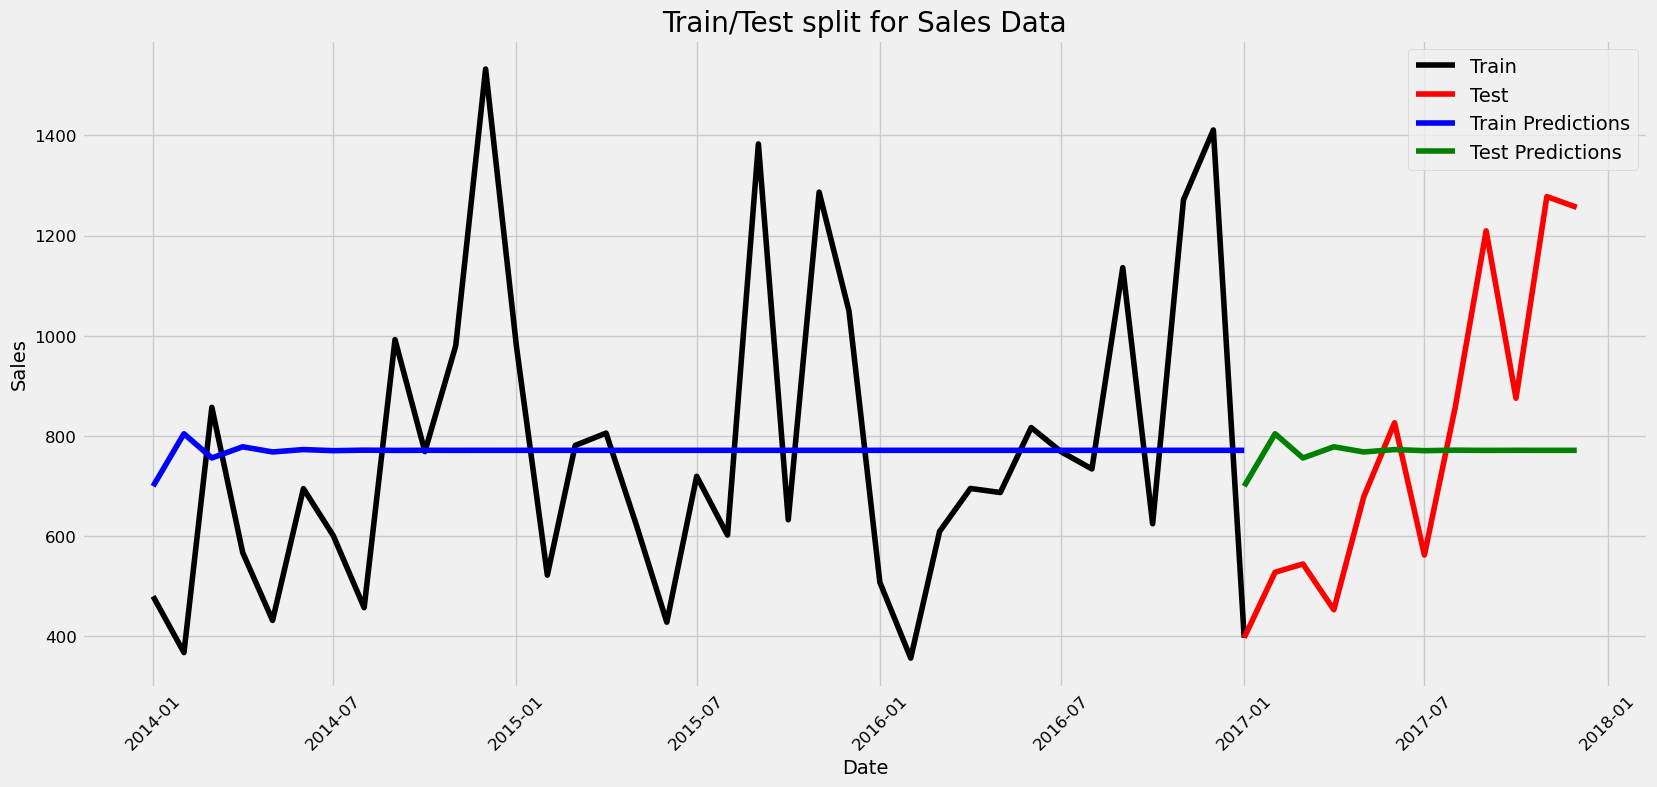

RMSE:  299.1989022103494


In [26]:
ARIMAmodel = ARIMA(train, order = (1, 0, 1))

ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [27]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   37
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -263.811
Date:                Wed, 15 Nov 2023   AIC                            535.622
Time:                        23:00:28   BIC                            542.066
Sample:                    01-01-2014   HQIC                           537.894
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        771.4780     71.471     10.794      0.000     631.397     911.559
ar.L1         -0.4621      0.815     -0.567      0.571      -2.059       1.135
ma.L1          0.6069      0.705      0.860      0.3

C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


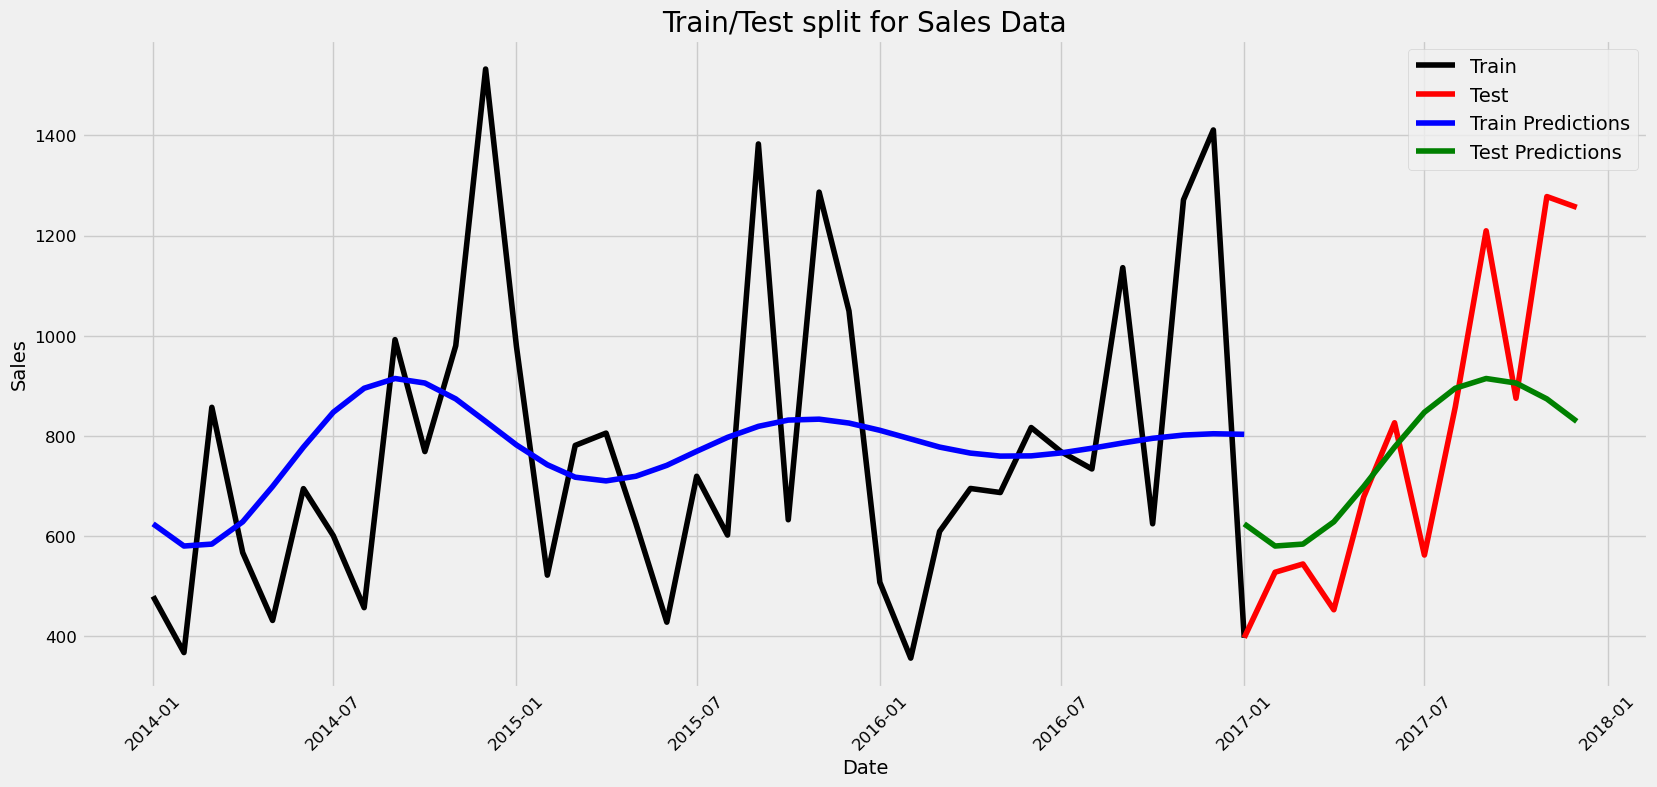

RMSE:  224.59680546382765


In [28]:
ARIMAmodel = ARIMA(train, order = (2, 0, 2))
ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [29]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   37
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -259.629
Date:                Wed, 15 Nov 2023   AIC                            531.258
Time:                        23:01:37   BIC                            540.924
Sample:                    01-01-2014   HQIC                           534.666
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        787.5657      5.895    133.590      0.000     776.011     799.120
ar.L1          1.6591      0.130     12.801      0.000       1.405       1.913
ar.L2         -0.8615      0.109     -7.924      0.0

C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


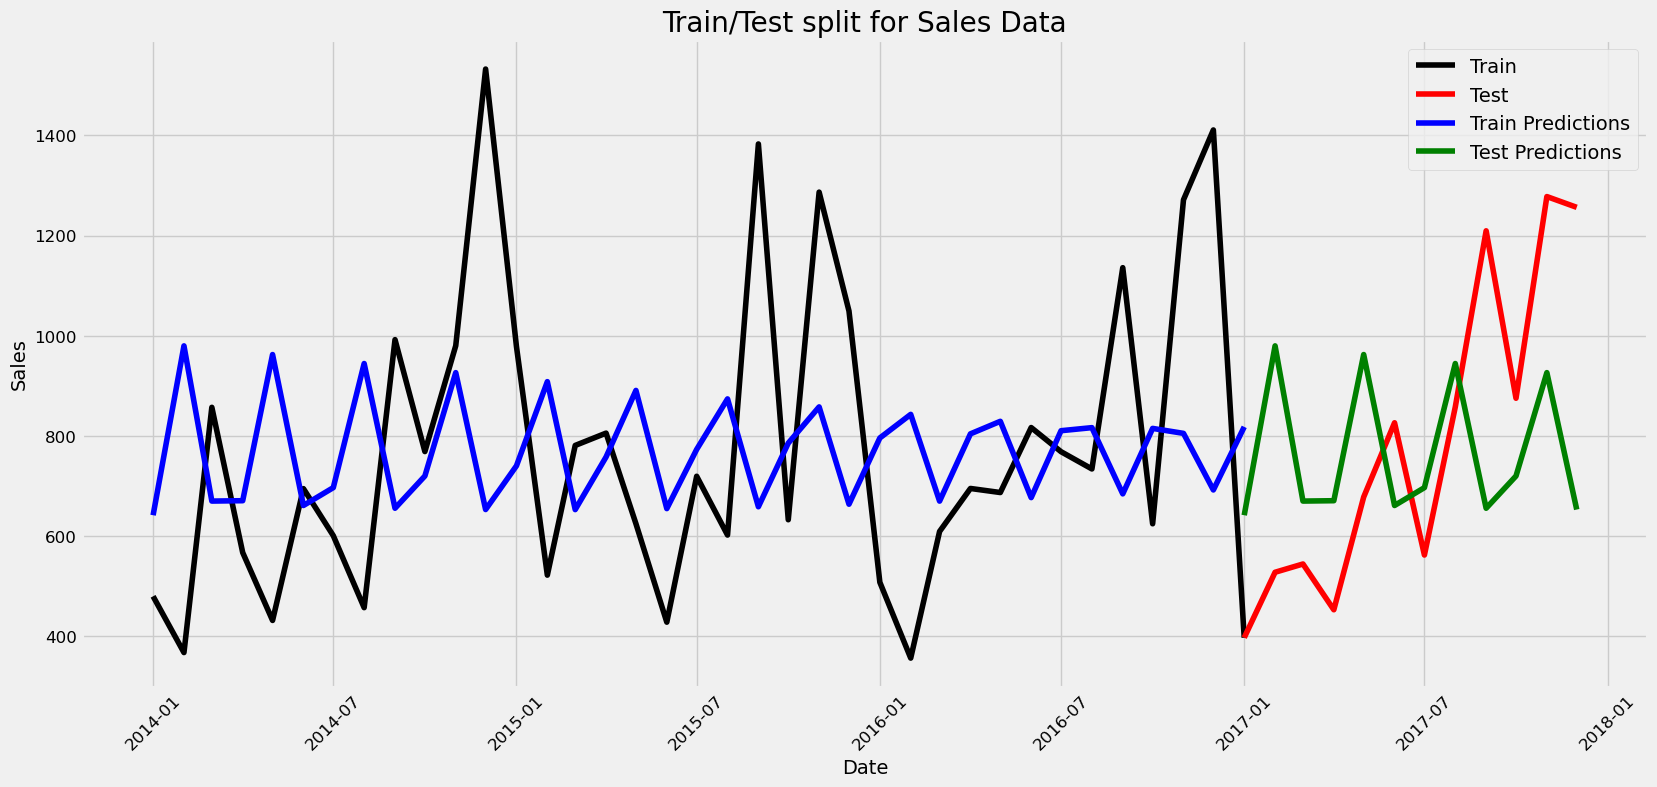

RMSE:  326.3664553114135


In [30]:
ARIMAmodel = ARIMA(train, order = (3,0,3))
ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Train set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [31]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   37
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -261.028
Date:                Wed, 15 Nov 2023   AIC                            538.057
Time:                        23:02:23   BIC                            550.944
Sample:                    01-01-2014   HQIC                           542.600
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        772.5733     66.722     11.579      0.000     641.800     903.347
ar.L1         -0.0504      0.239     -0.211      0.833      -0.519       0.418
ar.L2          0.0679      0.220      0.309      0.7

# SARIMA and SARIMAX

SARIMA(Seasonal Auto-Regressive Integrated Moving Average) is an updated version of the ARIMA model. we can say SARIMA is a seasonal equivalent model like SARIMA and Auto ARIMA.\

SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of SARIMA. It can also deal with external effects.

Trend Elements
There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

p: Trend autoregression order.

d: Trend difference order.

q: Trend moving average order.

Seasonal Elements
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.

D: Seasonal difference order.

Q: Seasonal moving average order.

m: The number of time steps for a single seasonal period.

### SARIMA

C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


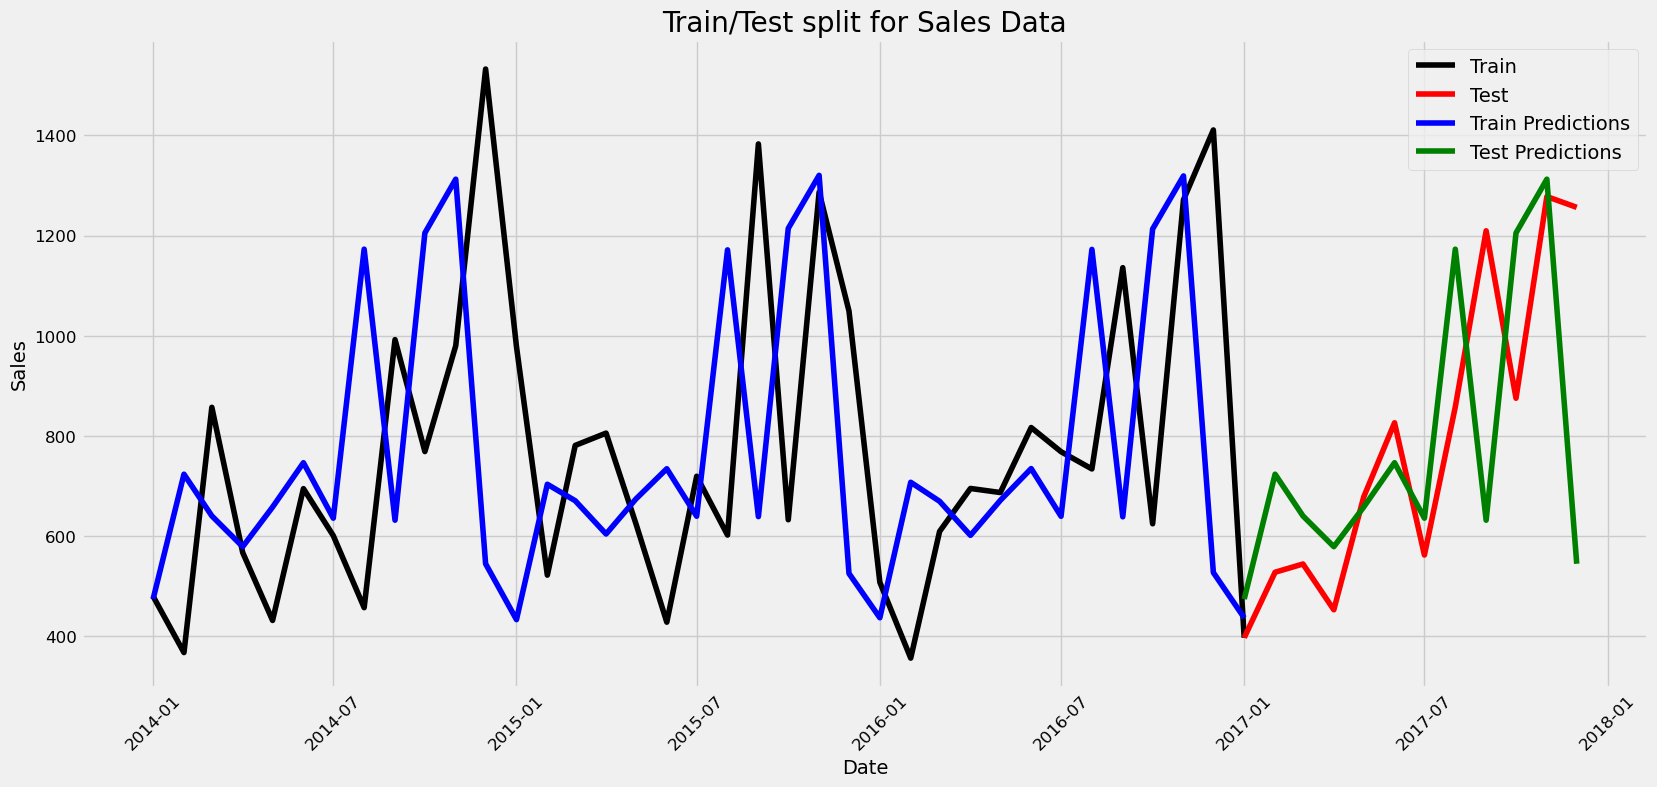

RMSE:  306.8586249516945


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train, order=(3, 0, 3),seasonal_order=(1, 1, 1, 12)) 
SARIMAXmodel = SARIMAXmodel.fit()
# we chose 12 in seasonal_order because our data in in months (12 months in a year)

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [ ]:
# print(SARIMAXmodel.summary())

## Grid Search for SARIMA for optimal parameter

In [33]:
p = d = q = range(0, 2)
P = Q = D = range(1, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, Q, D))]

In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:162.86109745799413
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:150.06780979466026
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:153.60365306062175
SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:139.72888451285476
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:161.94855194882723
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:151.9633500657735
SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:155.48738562220538
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:142.95282214974924


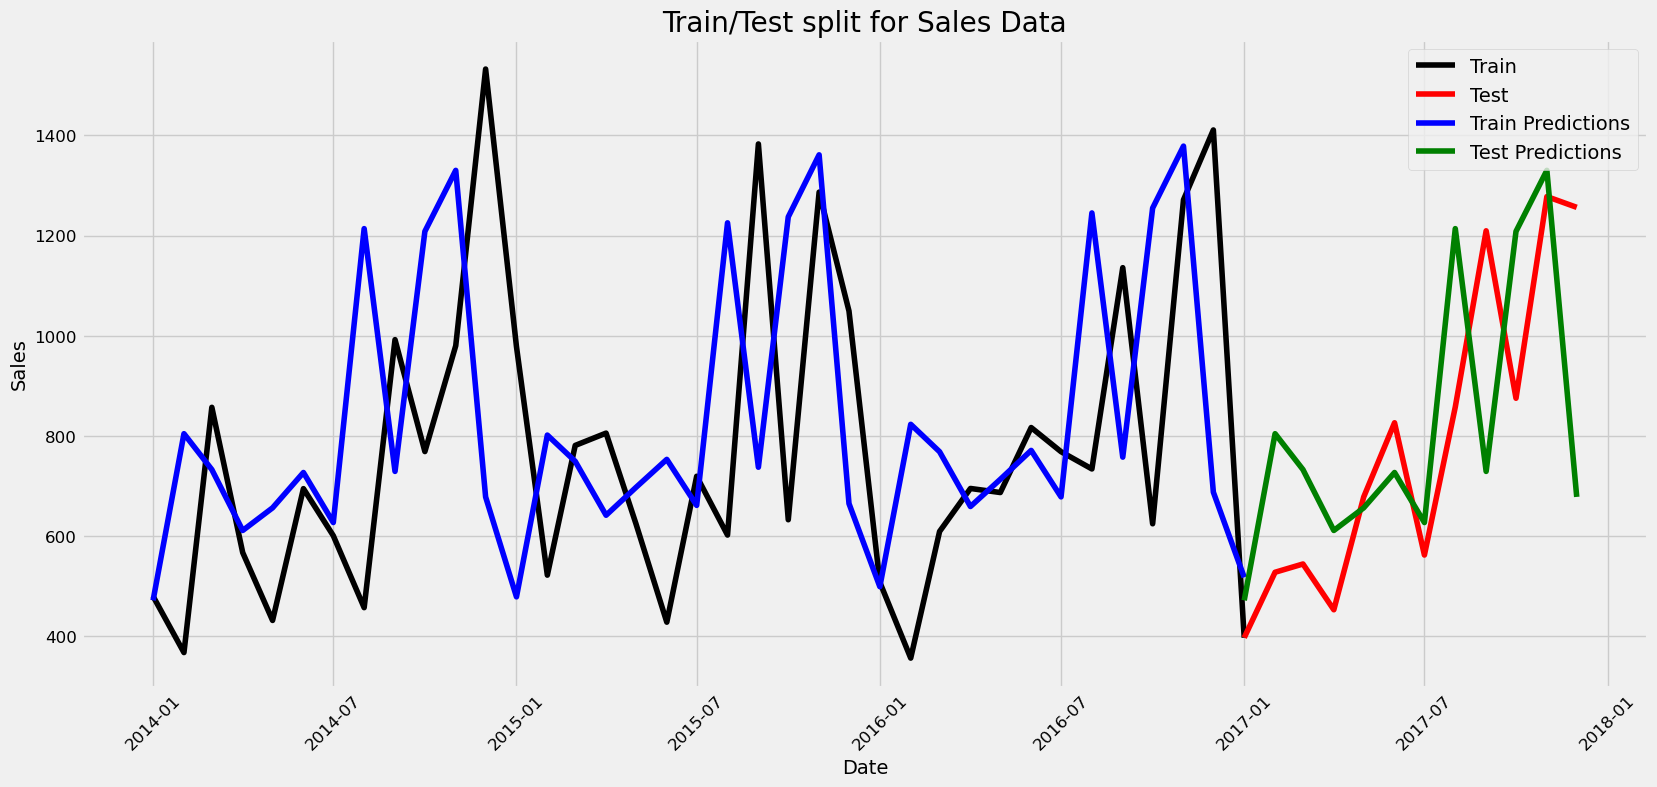

RMSE:  283.09535641261175


In [35]:
# Use optimal parameters from above with lowest AIC

SARIMAXmodel = SARIMAX(train, order=(0,1,1),seasonal_order=(1, 1, 1, 12)) 
SARIMAXmodel = SARIMAXmodel.fit()
# we chose 12 in seasonal_order because our data in in months (12 months in a year)

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

## Forcasting future values

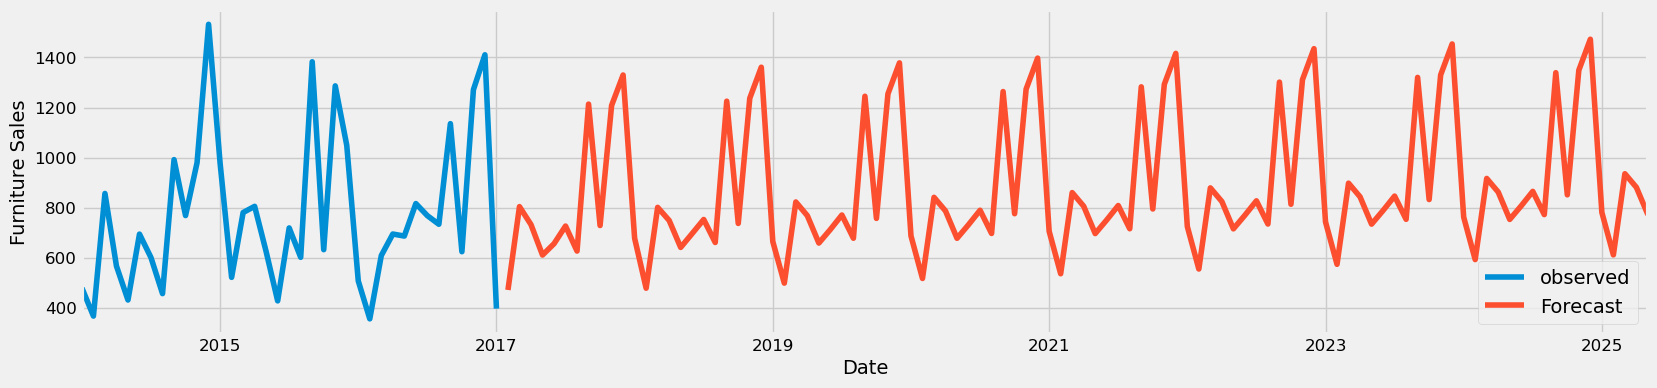

In [36]:
pred_uc = SARIMAXmodel.get_forecast(steps=100) # next 100 months forecast
pred_ci = pred_uc.conf_int()
ax = train.plot(label='observed', figsize=(18, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### SARIMAX

Now we will use exogenous variables/factors that will help us getting more accurate predictions

In [37]:
furniture = furniture_df.groupby('Order Date')['Sales','Quantity','Discount'].sum().reset_index()

In [38]:
furniture

,Order Date,Sales,Quantity,Discount
0,2014-01-06,2573.8200,9,0.00
1,2014-01-07,76.7280,3,0.60
2,2014-01-10,51.9400,1,0.00
3,2014-01-11,9.9400,2,0.00
4,2014-01-13,879.9390,9,0.15
...,...,...,...,...
884,2017-12-24,1393.4940,14,0.50
885,2017-12-25,832.4540,14,0.80
886,2017-12-28,551.2568,17,2.02
887,2017-12-29,2330.7180,26,0.20


In [39]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [40]:
month_data = furniture[['Sales','Quantity','Discount']].resample('MS').mean()

In [41]:
month_data.head()

,Sales,Quantity,Discount
Order Date,,,
2014-01-01,480.194231,5.384615,0.207692
2014-02-01,367.931600,4.600000,0.160000
2014-03-01,857.291529,7.705882,0.447059
2014-04-01,567.488357,5.785714,0.246429
2014-05-01,432.049188,6.062500,0.384375


In [42]:
train = month_data[month_data.index <= pd.to_datetime("2017-01-01", format='%Y-%m-%d')]
test = month_data[month_data.index >= pd.to_datetime("2017-01-01", format='%Y-%m-%d')]

In [43]:
exog_columns_train = train.drop(['Sales'],1)
exog_columns_test = test.drop(['Sales'],1)

In [45]:
# train.Sales

C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


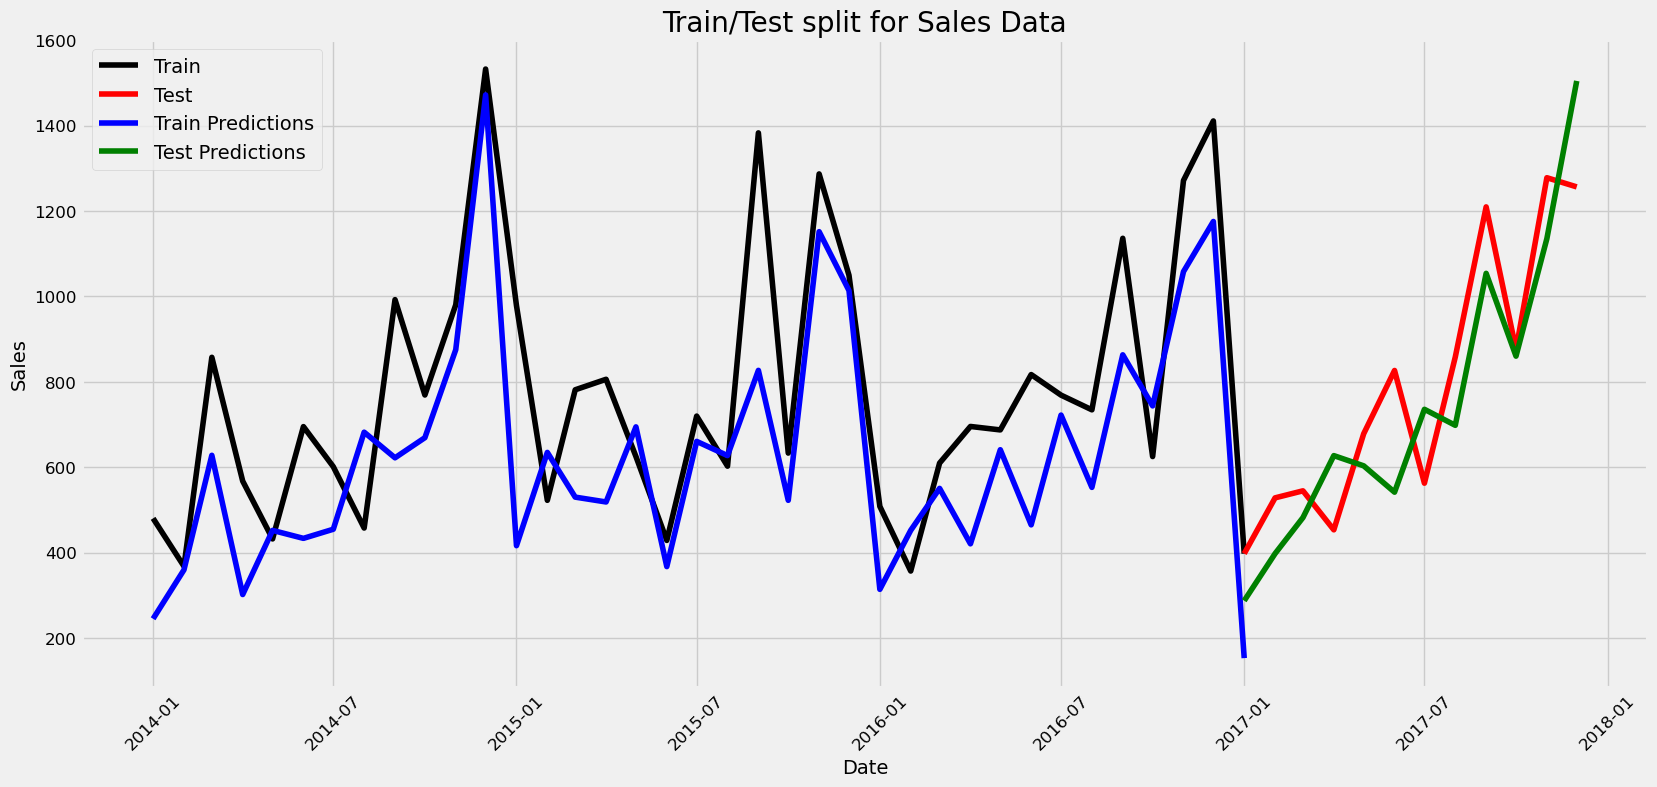

RMSE:  161.26353066021912


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train.Sales,exog=exog_columns_train, order=(0, 1, 1),seasonal_order=(1, 1, 1, 12))
SARIMAXmodel = SARIMAXmodel.fit()

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index), exog=exog_columns_train) #only providing dates (test.index) from test as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1],
                                                     exog=exog_columns_train)

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index),exog=exog_columns_test)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1],
                                               exog=exog_columns_test)

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train.Sales, color = "black", label = 'Train')
plt.plot(test.Sales, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.Sales, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

When including exogenous variables in a forecasting model, it is being assumed that all exogenous inputs are known into the future. Do not include exogenous variables as predictors if their future value will not be known when doing predictions.

## Using Machine Learning Model

In [47]:
train.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

In [48]:
import numpy as np
 
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.Sales

In [49]:
X[:10]

array([[   1,    1, 2014],
       [   1,    2, 2014],
       [   1,    3, 2014],
       [   1,    4, 2014],
       [   1,    5, 2014],
       [   1,    6, 2014],
       [   1,    7, 2014],
       [   1,    8, 2014],
       [   1,    9, 2014],
       [   1,   10, 2014]])

In [50]:
Y[:10]

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
2014-06-01    695.059242
2014-07-01    601.169500
2014-08-01    457.521656
2014-09-01    992.353367
2014-10-01    769.015437
Freq: MS, Name: Sales, dtype: float64

In [51]:
# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.Sales

In [53]:
testX

array([[   1,    1, 2017],
       [   1,    2, 2017],
       [   1,    3, 2017],
       [   1,    4, 2017],
       [   1,    5, 2017],
       [   1,    6, 2017],
       [   1,    7, 2017],
       [   1,    8, 2017],
       [   1,    9, 2017],
       [   1,   10, 2017],
       [   1,   11, 2017],
       [   1,   12, 2017]])

In [54]:
testY[:10]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
Freq: MS, Name: Sales, dtype: float64

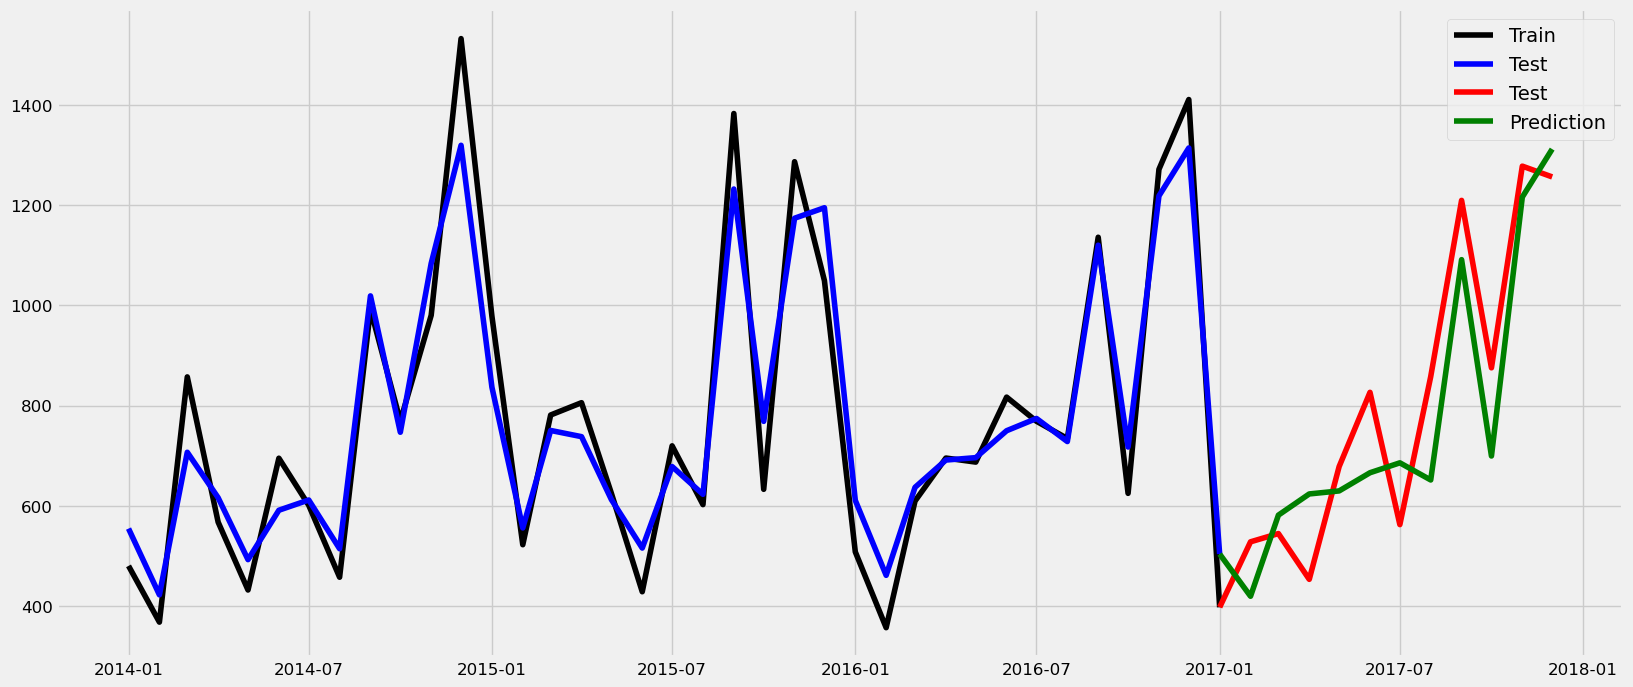

RMSE:  126.21419438052872


In [55]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)

# predict for the test set period
preds_train = rfmodel.predict(X)

# predict for the test set period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index, train.Sales,color="black", label='Train')
plt.plot(train.index, preds_train,color="blue", label='Test')
plt.plot(test.index, test.Sales,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.Sales, preds))
print("RMSE: ",rf_rmse)

# Homework 

### Generating Future Dates for Prediction

In [56]:
futureX = pd.date_range(start='01/04/2022', end='30/06/2022')

In [57]:
futureX

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', length=178, freq='D')

In [ ]:
# extract the day, month and year


In [ ]:
# predict on future dates
